In [2]:
import pandas as pd

import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])
plt.rcParams.update({
    "font.family": "Arial",   # specify font family here
    "font.serif": ["sans-serif"],  # specify font here
    "font.size":11})          # specify font size here

from scipy import constants

#Import personal functions
import sys
sys.path.append("C:/Users/Olivi/Documents/Git/SoRoMa/Thermal_Soft_Robotics_data/Functions")
#sys.path.append("C:/Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Functions")
#sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot

In [4]:
#Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Git\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Pouch\Data\05L"
Location = r"C:\Users\Olivi\Documents\Git\SoRoMa\Thermal_soft_robotics_data\Thermal_actuation\Experimental\Fluidic\Pouch\Data\Mass_sweep"
Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 5
Loading... Folder 1 of 1, Sample 2 of 5
Loading... Folder 1 of 1, Sample 3 of 5
Loading... Folder 1 of 1, Sample 4 of 5
Loading... Folder 1 of 1, Sample 5 of 5


In [5]:
# Pop failed experiments
data[0][1].pop('SSCDP15-4')
data[0][2].pop('SSCDP15-4')
data[0][3].pop('SSCDP30-2')

0          -62.607184
1          -33.465978
2          -10.201578
3            7.771718
4           21.039609
              ...    
1706895    136.692754
1706896    134.557085
1706897    136.430641
1706898    143.211097
1706899    155.796126
Name: SSCDP30-2, Length: 1706900, dtype: float64

In [6]:
data[0][3]

,SSCDP15-4,Time
0,-13.995961,0.001
1,-13.076173,0.002
2,-12.682747,0.003
3,-12.723046,0.004
4,-13.104434,0.005
...,...,...
1706895,14440.763350,1706.896
1706896,14448.494074,1706.897
1706897,14458.562473,1706.898
1706898,14471.202828,1706.899


In [7]:
# Pressure generation 
# 0 = volume of fixed container
# v1 = volume of compressed air 
# p1 = desired pressure 
#Goal n_novec for given pressure 
p1 = 50e3
P_amb = 1e5
V_bottle = 0.525e-3
rho_air = 1.204 # kg/m3 @ P_amb and 20 deg 
M_air = 28.9647e-3 # kg/mol
n_air = rho_air*V_bottle/M_air 
n_air

R = constants.R

T_amb = 50+273

v1= n_air*R*T_amb/(p1+P_amb)
v1

V_novec = V_bottle-v1
n_novec = (p1+P_amb)*V_novec/(R*T_amb)

# Vapor mass 
M = 200 # g/mol
m_novec = M*n_novec
m_novec


1.5000505145877818

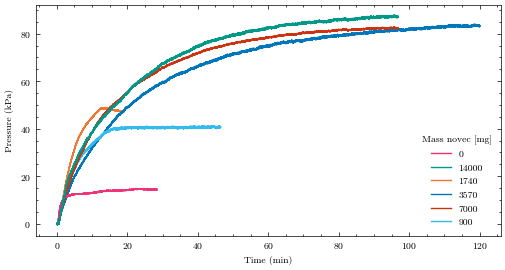

In [12]:
plt.figure(figsize=(6, 3))
P_mass = {}
df_sim_fit = pd.DataFrame()
for i, df in enumerate(data[0]):
    t = data[0][i]['Time'] / 60

    samplename = data[1]['Samplename'][i]

    # Splitting the samplename based on sensor identifiers
    parts_ai11 = samplename.split('_ai4-')
    number_ai11 = parts_ai11[0].rstrip('mg') if len(parts_ai11) > 1 else None

    parts_ai2 = samplename.split('_ai2')
    number_ai2 = parts_ai2[0].split('-')[-1].rstrip('mg') if len(parts_ai2) > 1 else None

    if 'SSCDP15-4' in df.columns:
        P = df['SSCDP15-4'] / 1000
        label = f"{number_ai11}" if number_ai11 else None
        plt.plot(t, P, label=label)
        P_mass[number_ai11] = (max(P))

    if 'SSCDP30-2' in df.columns:
        P = df['SSCDP30-2'] / 1000
        label = f"{number_ai2}" if number_ai2 else None
        plt.plot(t, P, label=label)
        P_mass[number_ai2] = max(P)

    # store one run for sim fitting 
    '''
    if number_ai11 == str(3570):
        df_sim_fit = df
        break
    elif number_ai2 == str(3570):
        df_sim_fit = df
        break
 
     
    print(number_ai11, number_ai2)
    '''

    #if i == 3:
        #break

plt.ylabel('Pressure (kPa)')
plt.xlabel('Time (min)')

# Collect handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Sort them by labels (alphabetically)
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: x[1])
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Create the legend with sorted handles and labels
plt.legend(sorted_handles, sorted_labels,title='Mass novec [mg]')
#plt.savefig('figures/mass_sweep_extended', dpi=300)
plt.show()

In [ ]:
#df_sim_fit.to_csv('20240111_162222_3570mg.csv', index=False)

In [9]:
# Convert the dictionary to a DataFrame
# Keys of the dictionary become the column headers, and values become the column data
df_P_mass = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in P_mass.items()]))

print(df_P_mass)

        1740       3570        900          0       7000      14000
0  48.726477  83.974337  41.237871  14.835091  82.765737  87.838875


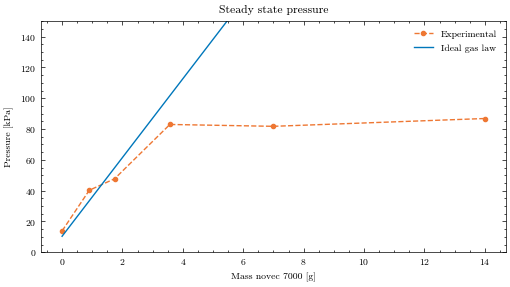

In [11]:

# Sorting the dictionary by keys (convert keys to integers for numerical sorting)
sorted_keys = sorted(P_mass, key=lambda x: int(x))
sorted_values = [P_mass[key]-1 for key in sorted_keys]

# Convert sorted keys to integers for plotting
sorted_keys_int = [int(key)/1000 for key in sorted_keys]

# Define variables
m_ideal = np.linspace(0, 14, 100)  # Mass range in grams (assuming)
V = 0.525e-3  # Volume in cubic meters
R = constants.R  # Ideal gas constant
M = 200  # Molar mass in g/mol
T = 50 + 273  # Temperature in Kelvin
P_amb = 101325  # Ambient pressure in Pascals (assuming standard atmospheric pressure)

# Calculate initial moles of air
T_amb = 20 + 273  # Ambient temperature in Kelvin
n0_air = V * P_amb / (R * T_amb)

# Convert mass to moles
n = m_ideal / M

# Calculate ideal pressure
P_ideal = ((n + n0_air) * R * T) / V-P_amb

# Plotting
plt.figure(figsize=(6, 3))
plt.plot(sorted_keys_int, sorted_values, marker='o', linestyle='--', label = 'Experimental')
plt.plot(m_ideal,P_ideal/1000, label = 'Ideal gas law')
plt.xlabel('Mass novec 7000 [g]')
plt.ylabel('Pressure [kPa]')
plt.title('Steady state pressure')
plt.ylim(0,150)
plt.locator_params(axis='x', nbins=10)  # Change 'nbins' to the desired number of ticks
plt.legend()
plt.savefig('figures/mass_sweep', dpi=300)